In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from combine_placecells import GetData, PlotPCs

In [3]:
DataFolder = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/'
CombinedDataFolder = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/PlaceCellResults_All/'
SaveFiguresFolder ='/home/sheffieldlab/Desktop/NoReward/PaperFigures/Figure3/'

In [4]:
gd = GetData(DataFolder, CombinedDataFolder)

### Remapping and Place cells

Task1 148 (148, 40)
Task2b 111 (111, 40)
Task3 137 (137, 40)
Task4 185 (185, 40)
Task1 76 (77, 40)
Task2b 48 (48, 40)
Task3 90 (96, 40)
Task4 59 (70, 40)
Task1 220 (220, 40)
Task2b 67 (67, 40)
Task3 281 (281, 40)
Task4 149 (149, 40)
Task1 149 (157, 40)
Task2b 119 (151, 40)
Task3 146 (144, 40)
Task4 115 (149, 40)
Task1 117 (125, 40)
Task2b 66 (66, 40)
Task3 132 (148, 40)
Task4 70 (72, 40)
Task1 105 (114, 40)
Task2b 80 (80, 40)
Task3 133 (144, 40)
Task4 104 (148, 40)
Task1 (841, 40)
Task2b (523, 40)
Task3 (950, 40)
Task4 (773, 40)


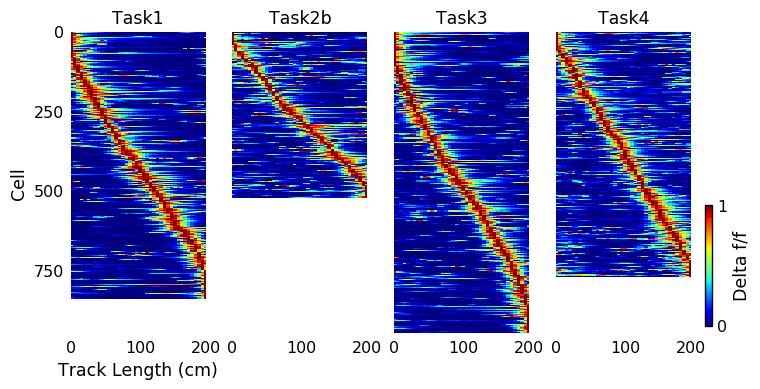

In [10]:
fs, ax = plt.subplots(1, 4, sharex='all', dpi=100)
numcell_tasks = gd.combine_placecells_pertask(fs, 
    ax, taskstoplot=['Task1', 'Task2b', 'Task3', 'Task4'])
for n, a in enumerate(ax):
    a.set_ylim((950, 0))
    sns.despine(right=True, top=True, left=True, bottom=True, ax=a)
    if n > 0:
        a.set_yticklabels('')
fs.set_size_inches((8, 4))
fs.savefig(os.path.join(SaveFiguresFolder, 'Placecells_pertask_heatmap.pdf'),  bbox_inches='tight', transparent=True)

## Control Animals

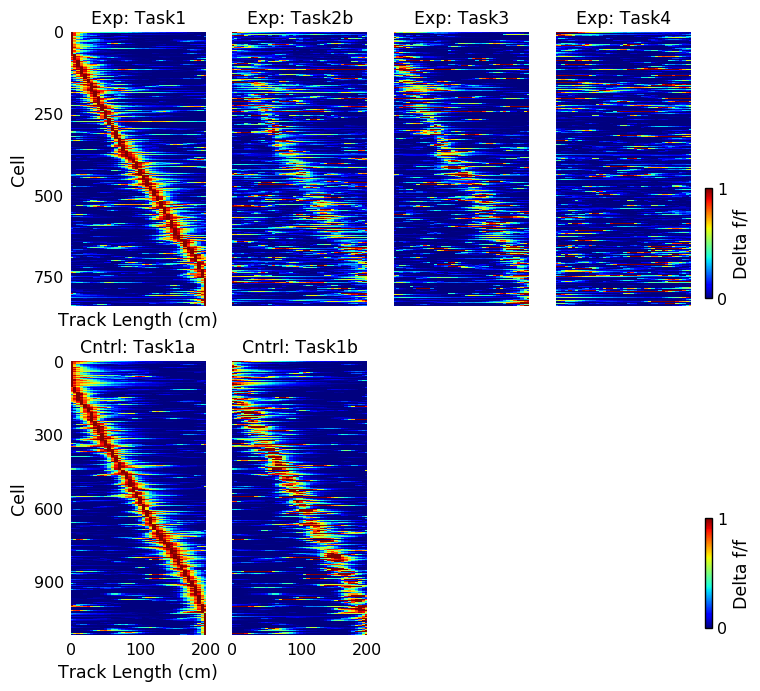

In [17]:
fs, ax = plt.subplots(2, 4, sharex='all', sharey='row', dpi=100)
c_exp = gd.combine_placecells_withtask(fs, ax[0, :], taskstoplot=['Task1', 'Task2b', 'Task3', 'Task4'])


ControlFolder = '/home/sheffieldlab/Desktop/NoReward/ControlData/Dataused/'
c_cntrl = gd.combine_control_placecells(fs, ax[1, :], ControlFolder, taskstoplot=['Task1a', 'Task1b'], controlflag=1)

for a in ax.flatten():
    sns.despine(right=True, top=True, left=True, bottom=True, ax=a)

for a in ax[1, -2:]:
    a.axis('off')
        

fs.set_size_inches((8, 8))
fs.savefig(os.path.join(SaveFiguresFolder, 'Remapping_withTask1_heatmap.pdf'),  bbox_inches='tight', transparent=True)

Task1 with Task2b : 0.000
Task1 with Task3 : 0.000
Task1 with Task4 : 0.000


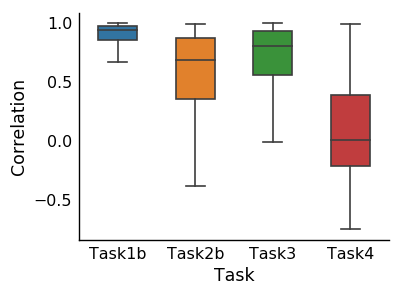

In [21]:
fs, ax = plt.subplots(1, dpi=100)
PlotPCs.plot_barplot_correlation(ax, c_cntrl, c_exp)
fs.set_size_inches((4, 3))
fs.savefig(os.path.join(SaveFiguresFolder, 'Placecells_remapping_correlation.pdf'),  bbox_inches='tight', transparent=True)

### Number of PCs per animal per task

Removing ouliers []
0
Multiple comparisons without removing outliers
Normality test for Task1 p-value 0.650
Normality test for Task2b p-value 0.982
Normality test for Task3 p-value 0.420
Performing Parametric test 

            Task1     Task2b      Task3
animal                                 
NR14    39.153439  29.365079  36.243386
NR23    20.052770  12.664908  23.746702
CFC4    11.434511   3.482328  14.604990
NR6     47.151899  37.658228  46.202532
NR24    34.513274  19.469027  38.938053
NR21    34.539474  26.315789  43.750000
Test Multiple Comparison ttest_rel 
FWER=0.05 method=Bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 Task1 Task2b  8.4432 0.0004    0.0011   True
 Task1  Task3 -1.5895 0.1728    0.5184  False
Task2b  Task3  -6.109 0.0017    0.0051   True
---------------------------------------------






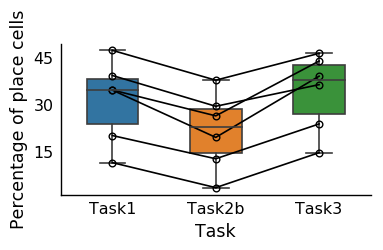

In [22]:
fs, ax = plt.subplots(1, dpi=100)
PlotPCs.plot_numcells(ax, numcell_tasks, taskstoplot=['Task1', 'Task2b', 'Task3'])
fs.set_size_inches((4, 2))

### COM for same place cells

In [ ]:
fs, ax = plt.subplots(1, 2, dpi=100)
a1 = gd.get_com_allanimal(fs, ax, taskA='Task2b', taskB='Task1', vmax=0)
fs.set_size_inches((5, 2))

In [ ]:
fs, ax = plt.subplots(1, 2, dpi=100)
a2 = gd.get_com_allanimal(fs, ax, taskA='Task3', taskB='Task1', vmax=0)
fs.set_size_inches((5, 2))